In [1]:
import numpy as np
import matplotlib.pyplot as plt
from csv import DictReader

In [2]:
fp = open("PR_pacienti2.csv", "rt", encoding="utf-8")
reader = DictReader(fp)

data_exp = dict()
data_info = dict()

for row in reader:
    data_exp[row["Gene ID"]] = []
    for key, value in row.items():
        if key != "Gene ID" and key != "Gene Name":
            data_exp[row["Gene ID"]] += [float(value)]
            

fd = open("PR_pacienti2_opis.csv", "rt", encoding="utf-8")
reader = DictReader(fd)

for row in reader:
    data_info[row["Run"]] = dict()
    data_info[row["Run"]]["age"] = int(row["Sample Characteristic[age]"][:2])
    data_info[row["Run"]]["smoke"] = row["Sample Characteristic[clinical information]"]
    data_info[row["Run"]]["person"] = row["Sample Characteristic[individual]"]
    data_info[row["Run"]]["tissue"] = row["Sample Characteristic[sampling site]"]
    data_info[row["Run"]]["gender"] = row["Sample Characteristic[sex]"]
        

In [3]:
fp = open("PR_pacienti2.csv", "rt", encoding="utf-8")
reader = DictReader(fp)

data_imenaGenov= dict()

for row in reader:
    data_imenaGenov[row["Gene ID"]] = row["Gene Name"]
data_imenaGenov

{'ENSG00000000003': 'TSPAN6',
 'ENSG00000000005': 'TNMD',
 'ENSG00000000419': 'DPM1',
 'ENSG00000000457': 'SCYL3',
 'ENSG00000000460': 'C1orf112',
 'ENSG00000000938': 'FGR',
 'ENSG00000000971': 'CFH',
 'ENSG00000001036': 'FUCA2',
 'ENSG00000001084': 'GCLC',
 'ENSG00000001167': 'NFYA',
 'ENSG00000001460': 'STPG1',
 'ENSG00000001461': 'NIPAL3',
 'ENSG00000001497': 'LAS1L',
 'ENSG00000001561': 'ENPP4',
 'ENSG00000001617': 'SEMA3F',
 'ENSG00000001626': 'CFTR',
 'ENSG00000001629': 'ANKIB1',
 'ENSG00000001630': 'CYP51A1',
 'ENSG00000001631': 'KRIT1',
 'ENSG00000002016': 'RAD52',
 'ENSG00000002079': 'MYH16',
 'ENSG00000002330': 'BAD',
 'ENSG00000002549': 'LAP3',
 'ENSG00000002586': 'CD99',
 'ENSG00000002587': 'HS3ST1',
 'ENSG00000002726': 'AOC1',
 'ENSG00000002745': 'WNT16',
 'ENSG00000002746': 'HECW1',
 'ENSG00000002822': 'MAD1L1',
 'ENSG00000002834': 'LASP1',
 'ENSG00000002919': 'SNX11',
 'ENSG00000002933': 'TMEM176A',
 'ENSG00000003056': 'M6PR',
 'ENSG00000003096': 'KLHL13',
 'ENSG00000003

In [4]:
fs = open("testfile1.csv", "rt")
reader = DictReader(fs)

data_stat = dict()

for row in reader:
    data_stat[row["geneId"]] = row["lung"]

data_stat_keys = set()
for key in data_stat:
    data_stat_keys.add(key)

In [5]:
data_presek = dict() #podatki za vse gene, ki so v obeh setih podatkov
for key, value in data_exp.items():
    if key in data_stat_keys:
        data_presek[key] = value
len(data_presek)

19503

In [6]:
data_geni = []
data_runs = []
for key in data_presek:
    data_geni += [key]

fp = open("PR_pacienti2.csv", "rt", encoding="utf-8")
reader = DictReader(fp)

for row in reader:
    for key in row:
        if key != "Gene ID" and key != "Gene Name":
            data_runs += [key]
    break

In [7]:
import pandas as pd

In [8]:
matrika_whole = np.loadtxt('GeniMatrika.csv', delimiter=",", skiprows=1, dtype = str)
matrika_whole

array([['ENSG00000000003', '3330.0', '3018.0', ..., '66.0', '310.0',
        '331.0'],
       ['ENSG00000000005', '9.0', '0.0', ..., '0.0', '2.0', '0.0'],
       ['ENSG00000000419', '1202.0', '1587.0', ..., '118.0', '568.0',
        '615.0'],
       ...,
       ['ENSG00000281613', '0.0', '0.0', ..., '0.0', '0.0', '0.0'],
       ['ENSG00000281887', '0.0', '0.0', ..., '1.0', '0.0', '0.0'],
       ['ENSG00000281899', '0.0', '0.0', ..., '0.0', '0.0', '0.0']],
      dtype='<U15')

In [9]:
#OMEJITVE
AGE_MIN = 0
AGE_MAX = 0
SMOKER = True #"smoker" / "ex-smoker" / "non-smoker"
PERSON = True #L400 - L881
TISSUE = True #"tumor tissue" / "non-malignant tissue"
GENDER = True #"male" / "female"


def isAge(run, AGE_MIN, AGE_MAX):
    run_age = int(data_info[run]["age"])
    return(AGE_MIN<=run_age and AGE_MAX>=run_age)

def isSmoker(run, SMOKER):
    return(data_info[run]["smoke"] == SMOKER or SMOKER == True)

def isPerson(run, PERSON):
    return(data_info[run]["person"] == PERSON or PERSON == True)
    
def isTissue(run, TISSUE):
    return(data_info[run]["tissue"] == TISSUE or TISSUE == True)

def isGender(run, GENDER):
    return(data_info[run]["gender"] == GENDER or GENDER == True)

def isALL(run, AGE_MIN, AGE_MAX, SMOKER, PERSON, TISSUE, GENDER):
    return(isAge(run, AGE_MIN, AGE_MAX) and isSmoker(run, SMOKER) and isPerson(run, PERSON) and
           isTissue(run, TISSUE) and isGender(run, GENDER))

def maska(pacienti = data_runs, AGE_MIN=0, AGE_MAX=100, SMOKER =True, PERSON=True, TISSUE=True, GENDER=True):
    pacient_bool = np.full((1,len(pacienti)), True, dtype = bool)[0]
    for i in range(len(pacienti)):
        pacient_bool[i] = isALL(pacienti[i], AGE_MIN, AGE_MAX, SMOKER, PERSON, TISSUE, GENDER)
    return pacient_bool

def uporabiMasko(matrika, maska):
    matrika_p = matrika
    matrika_p = np.transpose(matrika_p)
    matrika_p = matrika_p[maska, :]
    return np.transpose(matrika_p)

In [10]:
matrika_whole = np.loadtxt('GeniMatrika.csv', delimiter=",", skiprows=1, dtype = str)
matrika_whole

array([['ENSG00000000003', '3330.0', '3018.0', ..., '66.0', '310.0',
        '331.0'],
       ['ENSG00000000005', '9.0', '0.0', ..., '0.0', '2.0', '0.0'],
       ['ENSG00000000419', '1202.0', '1587.0', ..., '118.0', '568.0',
        '615.0'],
       ...,
       ['ENSG00000281613', '0.0', '0.0', ..., '0.0', '0.0', '0.0'],
       ['ENSG00000281887', '0.0', '0.0', ..., '1.0', '0.0', '0.0'],
       ['ENSG00000281899', '0.0', '0.0', ..., '0.0', '0.0', '0.0']],
      dtype='<U15')

In [11]:
matrika_lung = []
for key in data_presek:
    matrika_lung += [float(data_stat[key])]

In [12]:
gn = open("VTSGgeni.csv", "rt")
reader = DictReader(gn)
geni5plus = []

for row in reader:
    geni5plus += [row["geneName"]]
geni5plus = set(geni5plus)

In [13]:
geni_bool = np.full((1,19503), False, dtype=bool)[0]

for i in range(len(matrika_whole)):
    if data_imenaGenov[matrika_whole[i][0]] in geni5plus:
        geni_bool[i] = True
geni_bool

array([ True, False,  True, ..., False,  True, False])

In [14]:
matrika = matrika_whole[geni_bool, 1:]
matrika = np.array(matrika, dtype = float)
data_geni_red = matrika_whole[geni_bool, :1]

In [15]:
matrika.shape

(11469, 670)

In [16]:
matrika_norm = np.zeros((matrika.shape[0], matrika.shape[1]), dtype = float)

for i in range(len(matrika_norm)):
    for j in range(len(matrika_norm[i])):
        if matrika_lung[i]>0:
            matrika_norm[i][j] = matrika[i][j]/matrika_lung[i]
        else:
            matrika_norm[i][j] = 0.0

### OD TUKAJ NAPREJ JE DRUGAČE KOT PRI FILJU PACIENTI
###### Analiza po letih

In [17]:
matrika_leta_omejitev = matrika

#Uporabim masko za starost 50-60
mask = maska(TISSUE = "non-malignant tissue", AGE_MIN=51, AGE_MAX=60)
matrika_50_60_normal = uporabiMasko(matrika_leta_omejitev, mask) #Lahko uporabiš tudi ročno -> pazi da transponiraš
#Uporabim masko za starost 60-70
mask = maska(TISSUE = "non-malignant tissue", AGE_MIN=61, AGE_MAX=70)
matrika_60_70_normal = uporabiMasko(matrika_leta_omejitev, mask) #Lahko uporabiš tudi ročno -> pazi da transponiraš
#Uporabim masko za starost 70-80
mask = maska(TISSUE = "non-malignant tissue", AGE_MIN=71, AGE_MAX=80)
matrika_70_80_normal = uporabiMasko(matrika_leta_omejitev, mask) #Lahko uporabiš tudi ročno -> pazi da transponiraš

#Uporabim masko za starost 50-60
mask = maska(TISSUE = "tumor tissue", AGE_MIN=51, AGE_MAX=60)
matrika_50_60_tumor = uporabiMasko(matrika_leta_omejitev, mask) #Lahko uporabiš tudi ročno -> pazi da transponiraš
#Uporabim masko za starost 60-70
mask = maska(TISSUE = "tumor tissue", AGE_MIN=61, AGE_MAX=70)
matrika_60_70_tumor = uporabiMasko(matrika_leta_omejitev, mask) #Lahko uporabiš tudi ročno -> pazi da transponiraš
#Uporabim masko za starost 70-80
mask = maska(TISSUE = "tumor tissue", AGE_MIN=71, AGE_MAX=80)
matrika_70_80_tumor = uporabiMasko(matrika_leta_omejitev, mask) #Lahko uporabiš tudi ročno -> pazi da transponiraš


In [18]:
matrika_50_60_normal.shape,matrika_60_70_normal.shape,matrika_70_80_normal.shape
#matrika_50_60_tumor.shape,matrika_60_70_tumor.shape,matrika_70_80_tumor.shape

((11469, 22), (11469, 46), (11469, 2))

In [92]:
#50-60 normalizirana matrika   
matrika_norm_50_60 = np.zeros(matrika_50_60_tumor.shape)

for i in range(len(matrika_norm_50_60)):
    povp = np.mean(matrika_50_60_normal[i]);
    for j in range(len(matrika_norm_50_60[i])):        
        if povp==0:
            continue
        else:
            matrika_norm_50_60[i][j] = matrika_50_60_tumor[i][j]/povp;
            

    
#60-70 normalizirana matrika   
matrika_norm_60_70 = np.zeros(matrika_60_70_tumor.shape)

for i in range(len(matrika_norm_60_70)):
    povp = np.mean(matrika_60_70_normal[i]);
    for j in range(len(matrika_norm_60_70[i])):        
        if povp==0:
            continue
        else:
            matrika_norm_60_70[i][j] = matrika_60_70_tumor[i][j]/povp;


#70-80 normalizirana matrika   
matrika_norm_70_80 = np.zeros(matrika_70_80_tumor.shape)

for i in range(len(matrika_norm_70_80)):
    povp = np.mean(matrika_70_80_normal[i]);
    for j in range(len(matrika_norm_70_80[i])):        
        if povp==0:
            continue
        else:
            matrika_norm_70_80[i][j] = matrika_70_80_tumor[i][j]/povp;

    



In [88]:
from scipy.stats import t as student
import numpy as np

def meanStudent(seznamExp):
    xr = np.linspace(0,100, 1000)
    pars = student.fit(seznamExp)
    P_fit = [student.pdf(x, *pars) for x in xr ]
    return(P_fit.index(max(P_fit))*0.1)

def studentMain(ZELENA_matrika):

    maskaPovp = []
    MEJA = 1.5
    for i in range(len(ZELENA_matrika)):
        maskaPovp += [np.mean(ZELENA_matrika[i])]

    maskaPovp_bool = (np.array(maskaPovp) > MEJA)



    studentGenov = [] #Tale zna malo trajat
    for i in range(len(ZELENA_matrika)):
        if maskaPovp_bool[i]==False:
            studentGenov+=[MEJA]
        else:
            studentGenov+=[meanStudent(ZELENA_matrika[i])]

    studentGenov_sorted = (sorted(studentGenov)[::-1])[:20]
    top20genov = []

    for i in range(len(studentGenov)):
        if studentGenov[i] in studentGenov_sorted:
            top20genov+= [(data_geni[i], studentGenov[i])]

    return top20genov

In [93]:
##traja malo dlje(5-10min)
ai=studentMain(matrika_norm_50_60)
aj=studentMain(matrika_norm_60_70)
ak=studentMain(matrika_norm_70_80)

In [176]:
osamelci50_60 = {}
osamelci50_60_geni = []
osamelci60_70 = {}
osamelci60_70_geni = []
osamelci70_80 = {}
osamelci70_80_geni = []
geni=[]

for i,j in ai:
    osamelci50_60[i]=j
    osamelci50_60_geni.append(i)
    if i in geni:
        continue
    geni.append(i)
for i,j in aj:
    osamelci60_70[i]=j
    osamelci60_70_geni.append(i)
    if i in geni:
        continue
    geni.append(i)
for i,j in ak:
    osamelci70_80[i]=j    
    osamelci70_80_geni.append(i)
    if i in geni:
        continue
    geni.append(i)
xi = [i for i in range(0, len(geni))]

osm50_60=[]
osm60_70=[]
osm70_80=[]
imeGenov=[]
for c in geni:
    if c in osamelci50_60.keys():
        osm50_60.append(osamelci50_60[c])
    else:
        for gen in data_geni:            
            if gen == c:
                idx=data_geni.index(gen)                
                break
        osm50_60.append(meanStudent(matrika_norm_50_60[idx]))
        
    if c in osamelci60_70.keys():
        osm60_70.append(osamelci60_70[c])
    else:
        for gen in data_geni:            
            if gen == c:
                idx=data_geni.index(gen)                
                break
        
        osm60_70.append(meanStudent(matrika_norm_60_70[idx]))
        
    if c in osamelci70_80.keys():
        osm70_80.append(osamelci70_80[c])
    else:
        for gen in data_geni:            
            if gen == c:
                idx=data_geni.index(gen)                
                break
        osm70_80.append(meanStudent(matrika_norm_70_80[idx]))
        
    if(data_imenaGenov[c]==""):
        imeGenov.append("TBCE")
    else:
        imeGenov.append(data_imenaGenov[c])
    

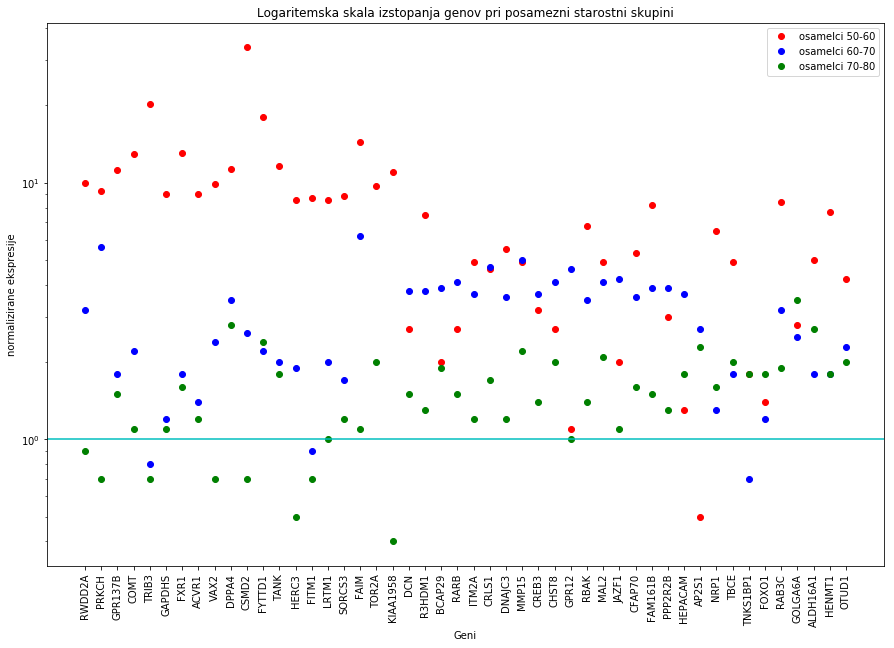

In [175]:

plt.figure(figsize=(15,10))
plt.plot(osm50_60, "ro", label = "osamelci 50-60")
plt.plot(osm60_70, "bo", label = "osamelci 60-70")
plt.plot(osm70_80, "go", label = "osamelci 70-80")
plt.yscale("log")
plt.axhline(y=1.0, color='c', linestyle='-')
plt.xticks(xi,imeGenov,rotation='vertical')
plt.xlabel("Geni")
plt.ylabel("normalizirane ekspresije")
plt.title("Logaritemska skala izstopanja genov pri posamezni starostni skupini")
plt.legend()
plt.show()